In [1]:
n = 25

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [3]:
def p(x):
    if x >= 0:
        return np.exp(-x)
    return 0    

In [4]:
selection = np.array(np.random.exponential(1, size=n))

In [5]:
s = sorted(selection)

## Пункт a

In [51]:
def a(selection):
    moda = stats.mode(selection)
    
    mediana = selection[n//2]
    
    scope = max(selection) - min(selection)
    
    mid = sum(selection)/n
    sigma2 = sum([(x - mid)**2 for x in selection])/n
    m3 = 6/(np.exp(1)) #посчитано в тетради
    coeff_asym = m3/sigma2
    
    return moda, mediana, scope, coeff_asym

In [52]:
a_param = a(s)
print(f"Мода: {list(a_param[0])[0]}\nМедиана: {a_param[1]}\nРазмах: {a_param[2]}\nКоэффициент асимметрии: {a_param[3]}")

Мода: [0.00155122]
Медиана: 0.44988258092718847
Размах: 6.076524028543916
Коэффициент асимметрии: 1.4840346677615948


## Пункт b

In [53]:
emperic = [i/n for i in range(1, n+1)]

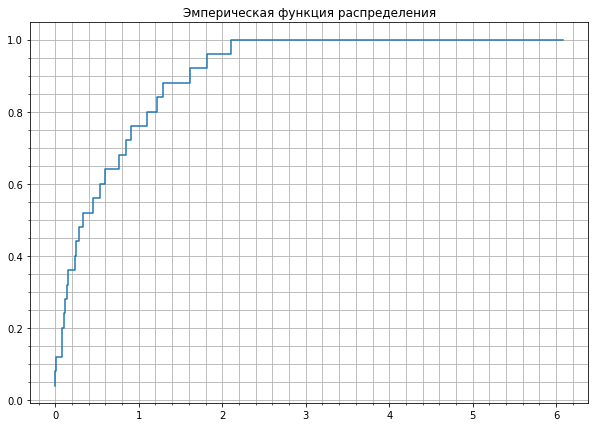

In [54]:
plt.figure(figsize=(10, 7))
plt.title("Эмперическая функция распределения")
plt.step(s, emperic)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')

In [55]:
k = 1+np.log2(n)
scope = math.ceil(a_param[2])
delta = scope//k
start = 0
starts = [0]
intervals = []
while start <= max(s):
    intervals.append([start, start + delta])
    start += delta
    starts.append(start)

In [56]:
heights = []
for interval in intervals:
    mi = 0
    for elem in s:
        if interval[0] <= elem <= interval[1]:
            mi += 1
    heights.append((mi/n)/delta)

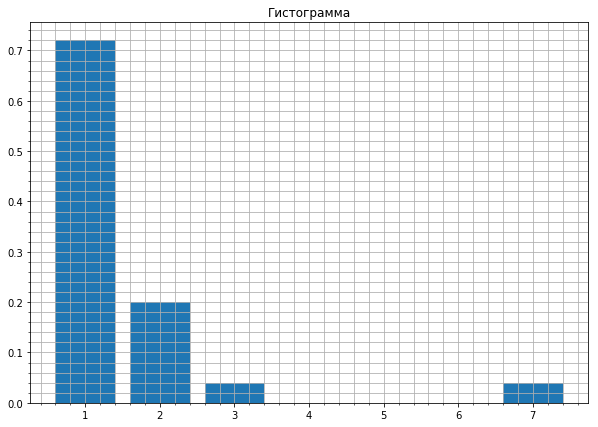

In [57]:
plt.figure(figsize=(10, 7))
plt.title("Гистограмма")
plt.bar([i for i in range(1, 8)], heights)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')

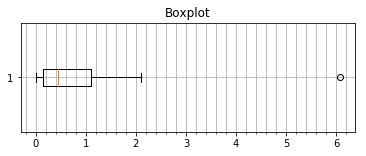

In [58]:
plt.figure(figsize=(6, 2))
plt.title("Boxplot")
plt.boxplot(s, vert=False)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')

## Пункт c

In [59]:
mid = sum(s)/n
sigma2 = sum([(x - mid)**2 for x in s])/(n-1)
h=2.344*(sigma2**(0.5))/(n*(1/5))

In [60]:
def q(y):
    return 0.75*(1-y**2)

def nuclear_estimation(z, h, selection):
    return (1/(n*h))*sum([q((z-i)/h) if q((z-i)/h) > 0 else 0 for i in selection])

In [61]:
X = np.linspace(s[0], s[-1], 100)
Y = [nuclear_estimation(x, h, s) for x in X]

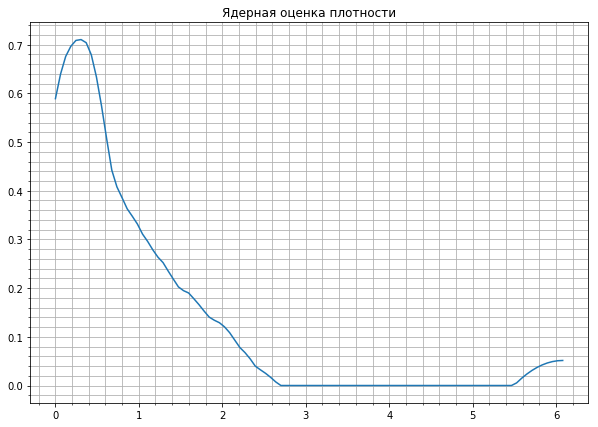

In [62]:
plt.figure(figsize=(10, 7))
plt.title("Ядерная оценка плотности")
plt.plot(X, Y)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')

## Пункт d

In [63]:
x_mid = np.linspace(0.5, 1.5, 1000)
raspr_mid = stats.norm.pdf(x_mid, loc = 1 , scale = 1/25)

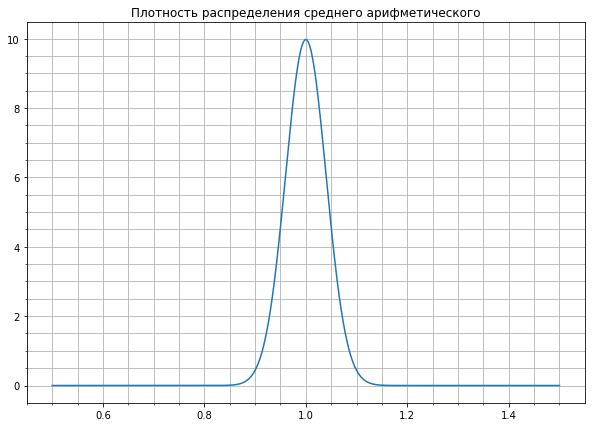

In [64]:
plt.figure(figsize=(10, 7))
plt.title("Плотность распределения среднего арифметического")
plt.plot(x_mid, raspr_mid)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')

In [65]:
def gaus_distribution(x):
    return 1/np.sqrt(2*np.pi*stats.moment(s, 2)/n)*np.exp(-0.5*(x-(sum(s)/n))**2/stats.moment(s, 2)*n)

In [41]:
bootstrap = [np.mean(np.random.choice(s, n)) for i in range(1000)]
x_selected_normir = list(np.histogram(bootstrap))
x_selected_normir[0] = x_selected_normir[0] / len(bootstrap)
x_selected_normir[0] = [x_selected_normir[0][i] / (x_selected_normir[1][i+1] - x_selected_normir[1][i]) for i in range(len(x_selected_normir[0]))]

In [42]:
gaus_dist = list(map(gaus_distribution, np.linspace(s[0], s[-1], 100)))

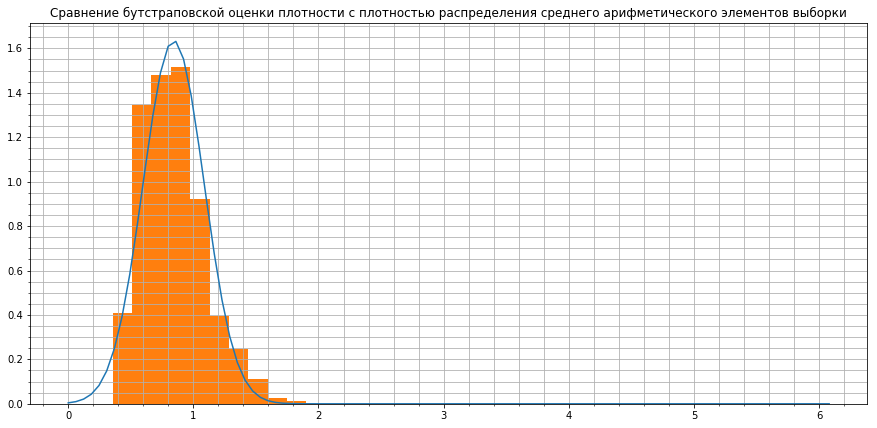

In [43]:
plt.figure(figsize = (15, 7))
plt.title("Сравнение бутстраповской оценки плотности с плотностью распределения среднего арифметического элементов выборки")
plt.plot(np.linspace(s[0], s[-1], 100), gaus_dist)
plt.hist(x_selected_normir[1][:-1], x_selected_normir[1], weights=x_selected_normir[0])
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')

## Пункт e

In [66]:
def coeff_asym(X):
    return stats.moment(X, 3)/(stats.moment(X, 2)**1.5)

In [67]:
bootstrap = [coeff_asym(np.random.choice(s, n)) for i in range(1000)]

x_selected_normir = list(np.histogram(bootstrap))

x_selected_normir[0] = x_selected_normir[0] / len(bootstrap)
x_selected_normir[0] = [x_selected_normir[0][i] / (x_selected_normir[1][i+1] - x_selected_normir[1][i]) for i in range(len(x_selected_normir[0]))]

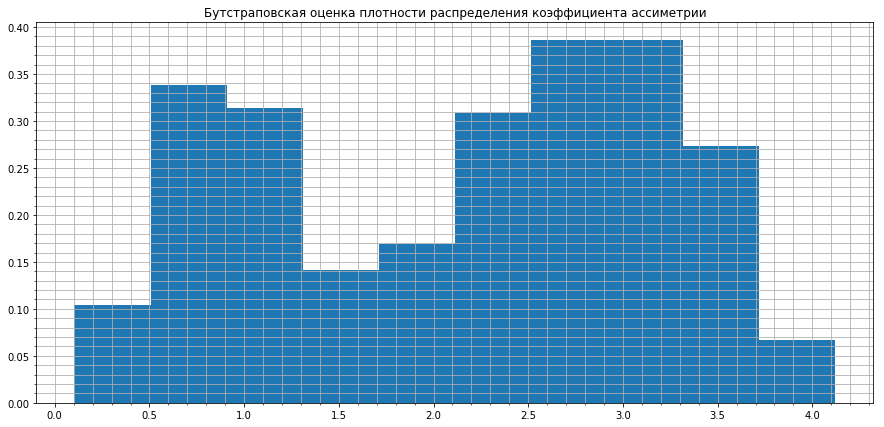

In [68]:
plt.figure(figsize = (15, 7))
plt.title("Бутстраповская оценка плотности распределения коэффициента ассиметрии")
plt.hist(x_selected_normir[1][:-1], x_selected_normir[1], weights=x_selected_normir[0])
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')